In [53]:
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [54]:
    datasets = tf.tsdf_standard_run(
        locatie='parkhaven',
        threshold=24,
        interpolate=12
    )


                                                         first  size
OW000-008/WNS7670 - gemeten waarde [mS/cm]                          
100386                                     2016-11-28 03:00:00    46
103435                                     2016-12-19 14:50:00   152
374108                                     2022-02-12 08:20:00  7655
         subset_start          subset_end  measurements
0 2015-01-01 00:00:00 2016-11-28 02:50:00        100385
1 2016-11-28 10:40:00 2016-12-19 14:40:00          3048
2 2016-12-20 16:10:00 2022-02-12 08:10:00        270672
3 2022-04-06 12:10:00 2022-07-04 13:40:00         12825


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

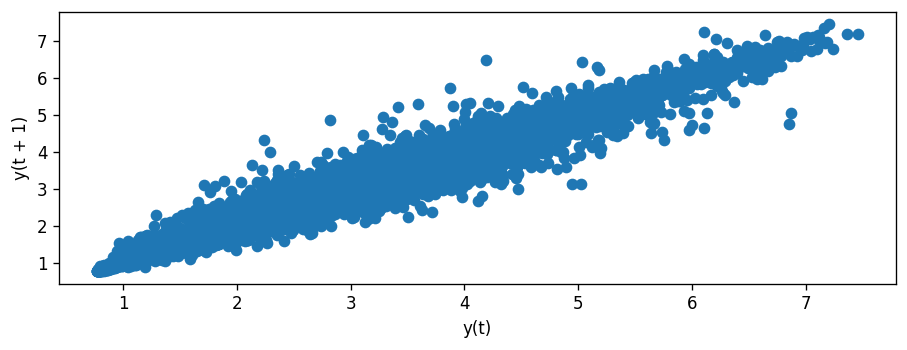

In [55]:
dataset = datasets[3]
series = dataset[dataset.columns[3]]
plt.figure()
lag_plot(series)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

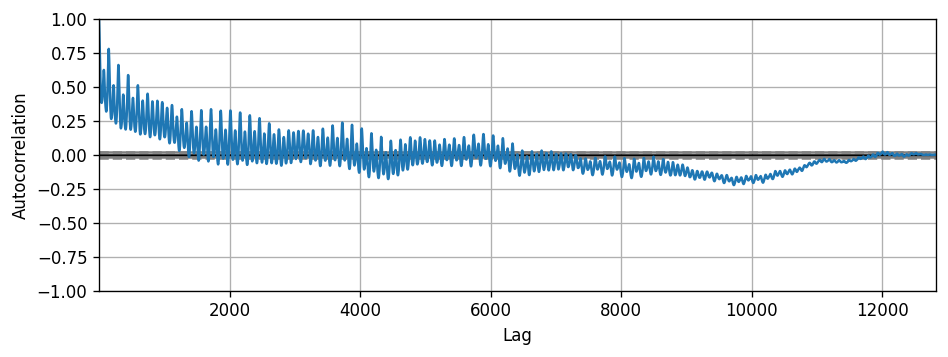

In [56]:
plt.figure()
autocorrelation_plot(series)

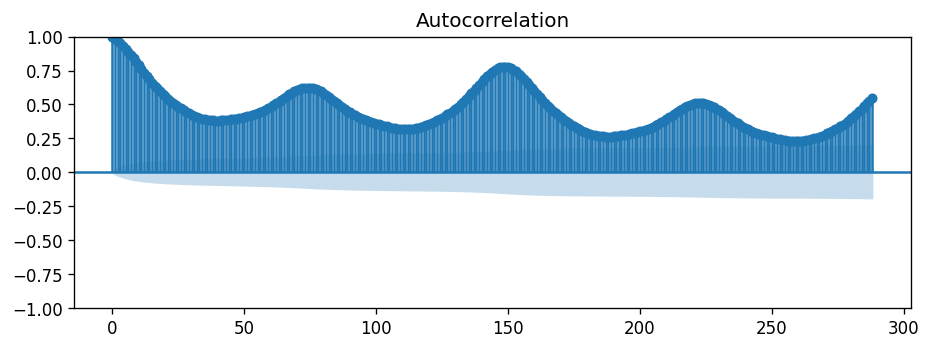

In [57]:
plot_acf(series, lags= 288);

In [58]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [59]:
print(adfuller(series))

(-8.269105954980526, 4.847333860977138e-13, 40, 12785, {'1%': -3.4308615849378814, '5%': -2.8617660955349473, '10%': -2.566890345695002}, -836.1273896635794)


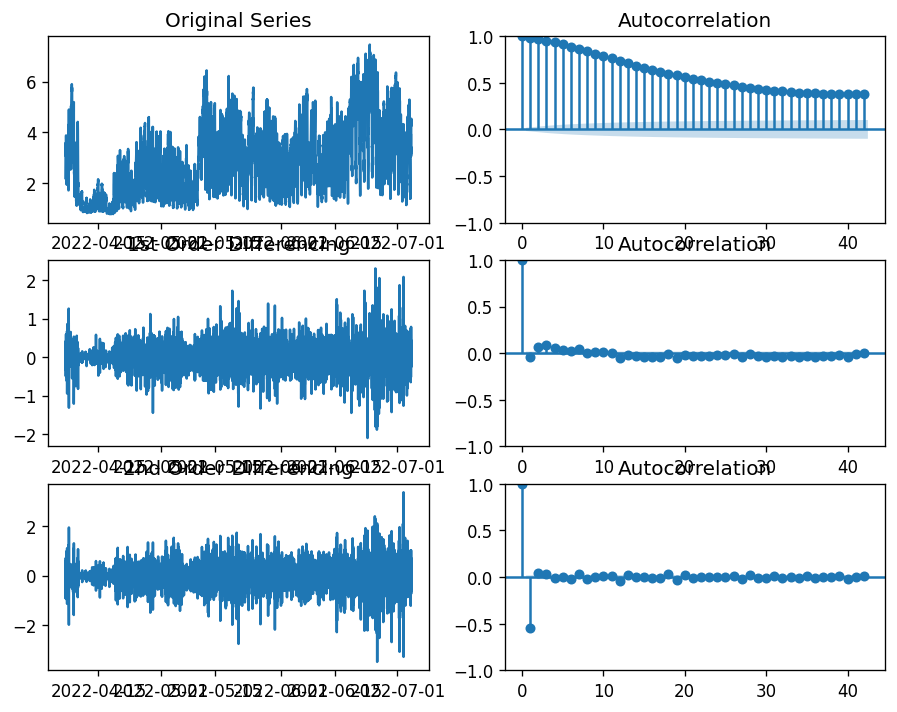

In [60]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = series

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [61]:
from pmdarima.arima.utils import ndiffs
y = series

## Adf Test
print(ndiffs(y, test='adf'))

# KPSS test
print(ndiffs(y, test='kpss'))

# PP test:
print(ndiffs(y, test='pp'))
# d = 1 !

0
1
0


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


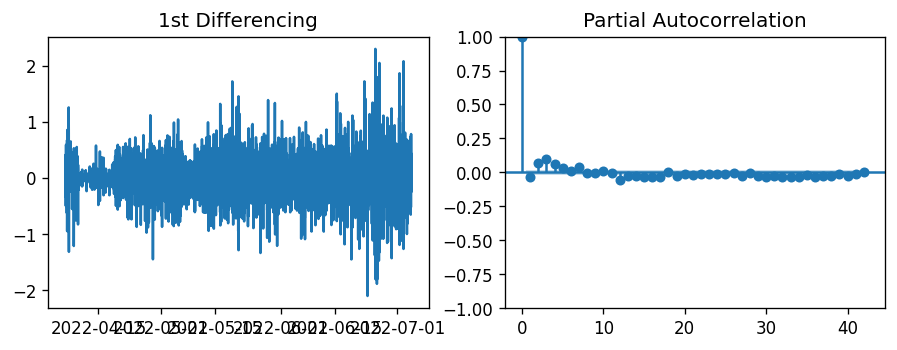

In [62]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(series.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,0.25))
plot_pacf(series.diff().dropna(), ax=axes[1])

plt.show()
# p = 5

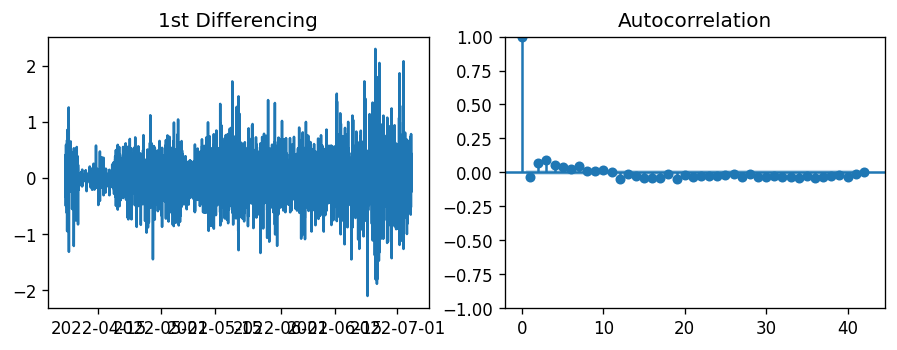

In [63]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data


fig, axes = plt.subplots(1, 2)
axes[0].plot(series.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(series.diff().dropna(), ax=axes[1])

plt.show()
# q = 1

In [90]:
# model = ARIMA(series,order = (5,1,1))
# res = model.fit()
# print(res.summary())
# res.plot_diagnostics();


                                           SARIMAX Results                                            
Dep. Variable:     OW000-008/WNS7670 - gemeten waarde [mS/cm]   No. Observations:                12826
Model:                                         ARIMA(5, 1, 1)   Log Likelihood                 294.994
Date:                                        Fri, 15 Jul 2022   AIC                           -575.988
Time:                                                14:43:09   BIC                           -523.774
Sample:                                            04-06-2022   HQIC                          -558.530
                                                 - 07-04-2022                                         
Covariance Type:                                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4

KeyboardInterrupt: 

2022-07-04 13:50:00    4.331649
2022-07-04 14:00:00    4.332151
2022-07-04 14:10:00    4.321460
2022-07-04 14:20:00    4.317010
2022-07-04 14:30:00    4.313564
2022-07-04 14:40:00    4.310931
2022-07-04 14:50:00    4.309000
2022-07-04 15:00:00    4.307558
2022-07-04 15:10:00    4.306488
2022-07-04 15:20:00    4.305695
Freq: 10T, Name: predicted_mean, dtype: float64

2022-07-04 12:10:00    3.836
2022-07-04 12:20:00    3.889
2022-07-04 12:30:00    3.851
2022-07-04 12:40:00    3.860
2022-07-04 12:50:00    4.298
2022-07-04 13:00:00    4.244
2022-07-04 13:10:00    4.473
2022-07-04 13:20:00    4.471
2022-07-04 13:30:00    4.534
2022-07-04 13:40:00    4.296
Freq: 10T, Name: OW000-008/WNS7670 - gemeten waarde [mS/cm], dtype: float64

In [105]:
train_series = series[:-6]
test_series = series[-6:]
model = ARIMA(train_series,order = (6,2,6))
res = model.fit()
print(res.summary())
res.plot_diagnostics();
# STOPPED RUN 144,2,144 AT 70 MINS, ARIMA TOO SLOW FOR LARGE ORDER/ do not use

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: 

<AxesSubplot:>

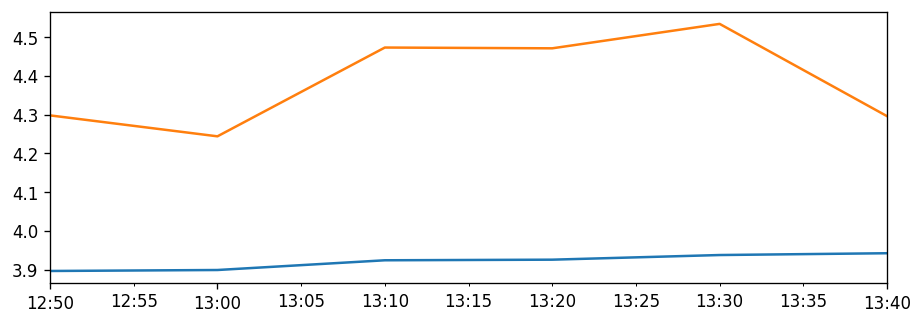

In [ ]:
res.forecast(6).plot()
test_series.plot()